In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [7]:
# --- Data Cleaning ---
# Drop Unnamed: 0 (index column)
df = df.drop('Unnamed: 0', axis=1)

In [9]:
# Check for outliers (basic check using IQR)
for col in ['TV', 'Radio', 'Newspaper', 'Sales']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
    if not outliers.empty:
        print(f"Outliers in {col}: {len(outliers)} values")

Outliers in Newspaper: 2 values


In [10]:
# --- Feature Selection ---
features = ['TV', 'Radio', 'Newspaper']
X = df[features]
y = df['Sales']

In [11]:
# --- Preprocessing ---
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Model ---
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
# --- Evaluate Model ---
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# --- Analyze Advertising Impact ---
print("\nAdvertising Impact (Feature Coefficients):")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")

Mean Absolute Error: 1.46
R² Score: 0.90

Advertising Impact (Feature Coefficients):
TV: 3.76
Radio: 2.79
Newspaper: 0.06


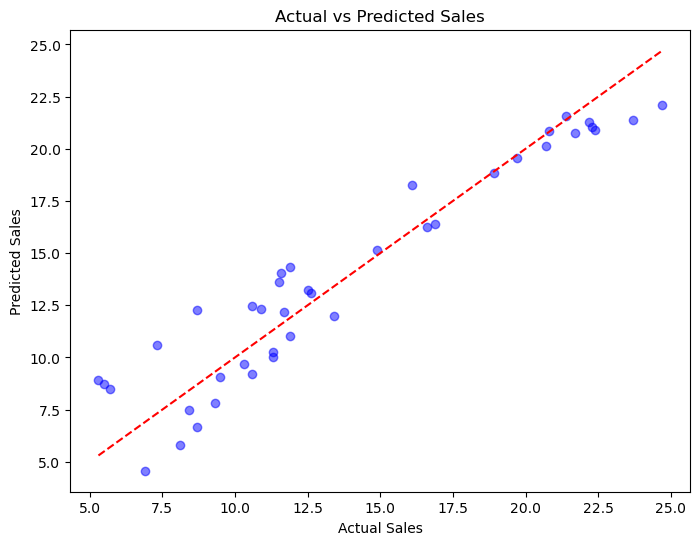

In [13]:
# --- Visualization ---
# Scatter plot: Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

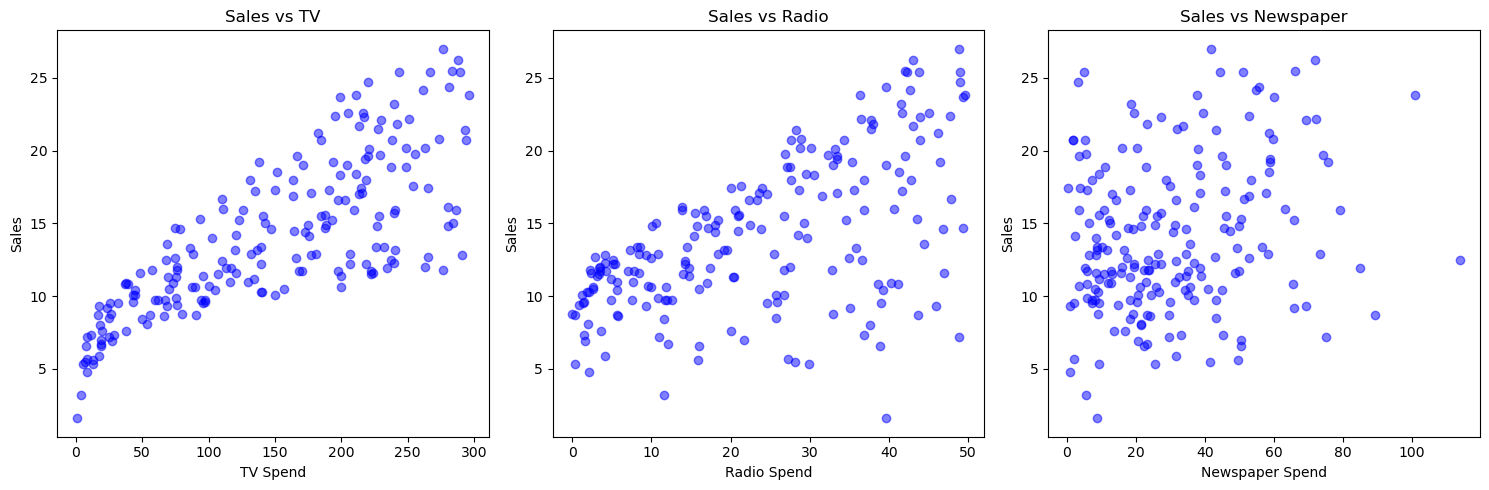

In [15]:
# Scatter plots: Sales vs Advertising Channels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['Sales'], color='blue', alpha=0.5)
    axes[i].set_xlabel(f'{feature} Spend')
    axes[i].set_ylabel('Sales')
    axes[i].set_title(f'Sales vs {feature}')
plt.tight_layout()
plt.show()

In [16]:
# --- Actionable Insights ---
print("\nBusiness Marketing Insights:")
print("- **TV Advertising**: Likely has the strongest impact on sales (check coefficients).")
print("- **Radio Advertising**: Moderate impact; consider reallocating budget if less effective.")
print("- **Newspaper Advertising**: Often less impactful; evaluate cost-effectiveness.")
print("- **Recommendations**:")
print("  - Allocate more budget to high-impact channels (e.g., TV).")
print("  - Test targeted campaigns for specific segments (e.g., urban vs. rural).")
print("  - Monitor real-time sales data to adjust advertising dynamically.")


Business Marketing Insights:
- **TV Advertising**: Likely has the strongest impact on sales (check coefficients).
- **Radio Advertising**: Moderate impact; consider reallocating budget if less effective.
- **Newspaper Advertising**: Often less impactful; evaluate cost-effectiveness.
- **Recommendations**:
  - Allocate more budget to high-impact channels (e.g., TV).
  - Test targeted campaigns for specific segments (e.g., urban vs. rural).
  - Monitor real-time sales data to adjust advertising dynamically.
